# Аналіз матриці чисел

### Задача:
Для матриці чисел зробити аналіз та висновки, оформити все та додати візуалізацію.

Етапи виконання проекта:
1. Отримання даних та обробка даних
2. Дослідницький аналіз даних
3. Декодування коду Морзе

## Етап 1. Oтримання даних
Вивчимо дані які отримали для проекта.

In [10]:
#імпорт бібліотек
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats
# from scipy.stats import pearsonr

Прочитаємо файл matrix.csv і збережемо його в змінну df.

In [11]:
#читання файлу з даними з збереженням його в "змінну" df
df = pd.read_csv(r'C:\Users\T\Desktop\Рома\matrix.csv')

Отримаємо перші 5 рядків таблиці.

In [12]:
#отримуємо перші 5 рядків таблиці
df.head(5)

,2,0,4,10,13,17,19,23,25,28,...,26,10.1,1.2,0.1,10.2,61.1,84,41.1,0.2,6
0,0,3,10,17,22,26,32,37,42,47,...,95,34,0,11,91,95,94,97,61,0
1,6,3,9,14,19,23,28,32,36,40,...,93,88,0,49,95,89,90,91,94,19
2,1,3,9,14,19,23,28,32,36,40,...,91,91,2,59,94,90,90,90,94,30
3,0,3,10,14,19,24,29,34,37,41,...,96,84,3,33,96,91,90,94,91,8
4,1,1,8,15,19,24,30,35,38,43,...,88,10,8,7,56,93,94,91,26,3


Отримали таблицю з числами, в якій перший рядок чисел імпортувався в назву таблиці, виправляємо це.

In [13]:
#Виправляємо помилку читання першого рядка.
df = pd.read_csv(r'C:\Users\T\Desktop\Рома\matrix.csv',header=None)

Повторно отримуємо перші 5 рядків таблиці.

In [14]:
#отримуємо перші 5 рядків таблиці
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,2,0,4,10,13,17,19,23,25,28,...,26,10,1,0,10,61,84,41,0,6
1,0,3,10,17,22,26,32,37,42,47,...,95,34,0,11,91,95,94,97,61,0
2,6,3,9,14,19,23,28,32,36,40,...,93,88,0,49,95,89,90,91,94,19
3,1,3,9,14,19,23,28,32,36,40,...,91,91,2,59,94,90,90,90,94,30
4,0,3,10,14,19,24,29,34,37,41,...,96,84,3,33,96,91,90,94,91,8


Загальна інформація для таблиці df.

In [15]:
#отримуємо загальну інформацію про таблицю і дані в ній
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       35 non-null     int64
 1   1       35 non-null     int64
 2   2       35 non-null     int64
 3   3       35 non-null     int64
 4   4       35 non-null     int64
 5   5       35 non-null     int64
 6   6       35 non-null     int64
 7   7       35 non-null     int64
 8   8       35 non-null     int64
 9   9       35 non-null     int64
 10  10      35 non-null     int64
 11  11      35 non-null     int64
 12  12      35 non-null     int64
 13  13      35 non-null     int64
 14  14      35 non-null     int64
 15  15      35 non-null     int64
 16  16      35 non-null     int64
 17  17      35 non-null     int64
 18  18      35 non-null     int64
 19  19      35 non-null     int64
 20  20      35 non-null     int64
 21  21      35 non-null     int64
 22  22      35 non-null     int64
 23  23      35 non-nu

Розглянемо отриману інформацію детальніше.

Всього в таблиці 44 стовпці, присутній один тип даних non-null int64(44 стовпці).
Всі дані в комірках це цілі числа, всі комірки заповнені повністю, відсутні NaN значення.
Оптимізацію типів даних не потрібно проводити, оскільки всі типи використовуються правильно.

Глянемо які мінімальні значення є в кожному стовпці.

In [16]:
#виведемо масив всіх мінімальних значень для кожної комірки
df.min().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Глянемо які максимальні значення є в кожному стовпці.

In [17]:
#виведемо масив всіх максимальних значень для кожної комірки
df.max().values

array([ 35,  94,  96,  95,  96,  96,  69,  37,  50,  97,  98,  98,  98,
        98,  98,  98, 100, 100, 100, 100,  99,  98,  98,  98,  98,  98,
        98,  95,  99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,
        97,  97,  98,  96,  39], dtype=int64)

__Висновки__

Кожен рядок таблиці включає в себе додатні цілі числа в діапазоні [0;100].

Назви стовпців таблиці відсутні.

## Етап 2. Дослідницький аналіз даних
Дослідимо дані які отримали для проекта.

<AxesSubplot:>

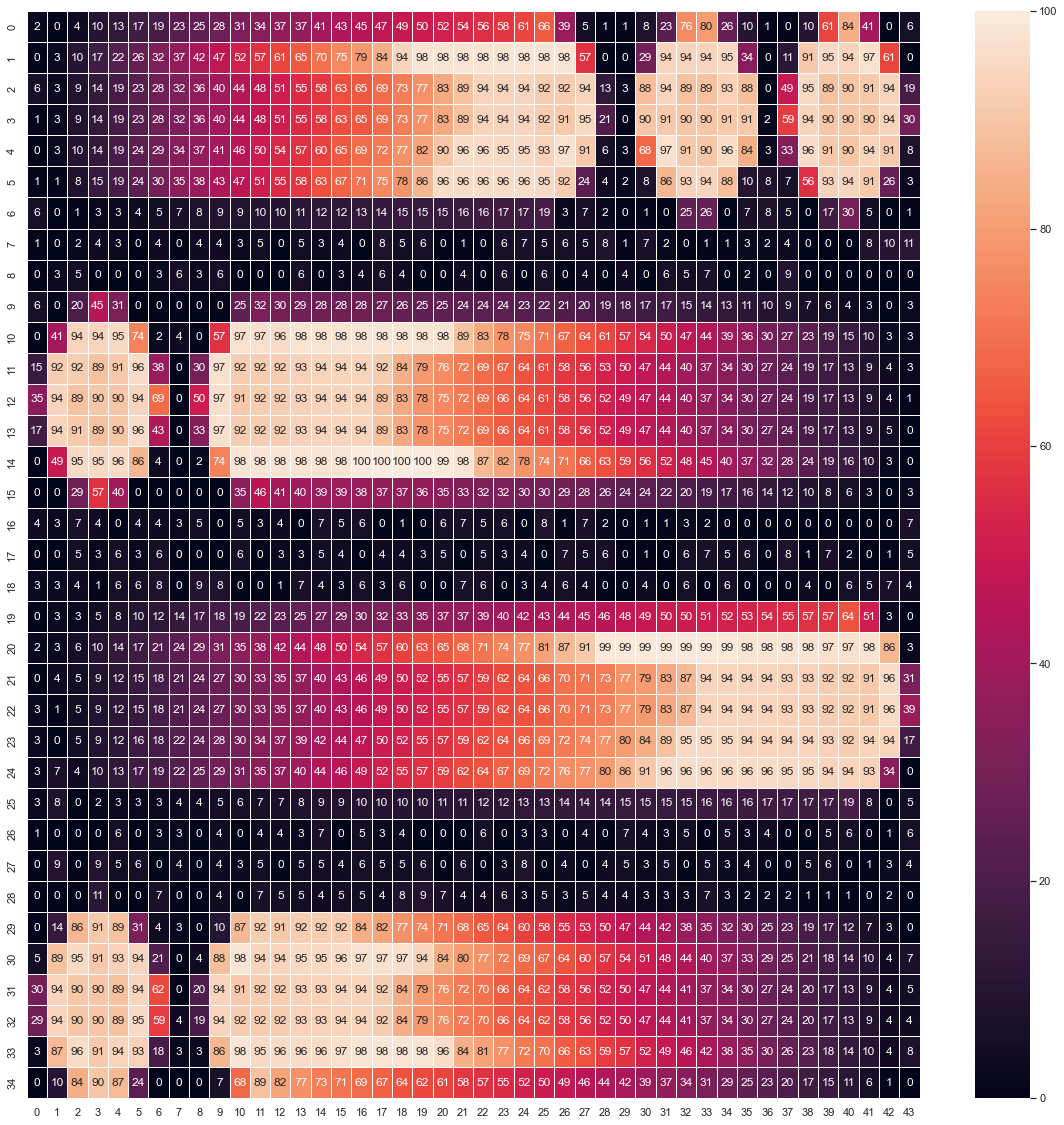

In [18]:
#імпортуємо бібліотеки для візуалізації даних з використанням графічного представлення даних,
# а саме теплокарти
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax)

__Висновки__

Оцінивши графічну візуалізацію матриці, можна зробити висновок, що в ній зашифровано послання з використанням азбуки Морзе
з кодом '-.. .- - .-'.

Зявляється одна проблема котру потрібно вирішити на наступному етапі: дешифрування коду Морзе.

## Етап 3. Декодування коду Морзе
Декодуємо код морзе в абетку англійських літер за допомогою коду наведеного нижче.

In [24]:
#збережемо в словнику з назвою MORSE_CODE_DICT абетку коду морзе в форматі "буква англійського алфавіту":"переклад" 
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-'}

In [22]:
#використаємо код який є наявним на https://www.geeksforgeeks.org/morse-code-translator-python/
#для декодування коду морзе, оскільки готових модулів(PIP) на даний момент не було знайдено
def decrypt(message):
 
    # extra space added at the end to access the
    # last morse code
    message += ' '
 
    decipher = ''
    citext = ''
    for letter in message:
 
        # checks for space
        if (letter != ' '):
 
            # counter to keep track of space
            i = 0
 
            # storing morse code of a single character
            citext += letter
 
        # in case of space
        else:
            # if i = 1 that indicates a new character
            i += 1
 
            # if i = 2 that indicates a new word
            if i == 2 :
 
                 # adding space to separate words
                decipher += ' '
            else:
 
                # accessing the keys using their values (reverse of encryption)
                decipher += list(MORSE_CODE_DICT.keys())[list(MORSE_CODE_DICT
                .values()).index(citext)]
                citext = ''
 
    return decipher

In [25]:
#Викличемо функцію decrypt() яка приймає в якості аргументу рядок коду Морзе з пробілами між кожним окремим елементом
decrypt('-.. .- - .-')

'DATA'

__Висновки__

На даному етапі ми змогли декодувати рядок Морзе в слово на англійський мові "DATA".
Можемо зробити висновок, що завдання є вирішеним, оскільки, імовірність що такий набір даних,
випадково мав в собі закодовано це слово на Морзе прямує до 0.
Тому пошук інших залежностей є непотрібним.